In [1]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_results_comparison(dataset, categories, AALH_values, ShaSpec_values):
    # Creating the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width and gap
    bar_width = 0.35
    bar_space = 0.05

    # Set position of bar on X axis
    r1 = range(len(AALH_values))
    r2 = [x + bar_width + bar_space for x in r1]

    # Make the plot
    ax.bar(r1, AALH_values, color='orange', width=bar_width, label='AALH', zorder=3)
    ax.bar(r2, ShaSpec_values, color='skyblue', width=bar_width, label='ShaSpec', zorder=3)

    # Adding labels
    ax.set_xlabel('Miss Rate [%]')
    ax.set_ylabel('Accuracy [%]')
    ax.set_xticks([r + bar_width + bar_space for r in range(len(AALH_values))])
    ax.set_xticklabels(categories)
    
    # Adjust the y-axis to start at 75 and end a little above the highest value
    ax.set_ylim(bottom=75, top=max(AALH_values + ShaSpec_values) + 2)

    # Add vertical stripes/grid
    ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='grey', linewidth=2, zorder=0)

    # Creating legend inside the plot area but above the bars and grid lines
    # Adjust the bbox_to_anchor values to suit your plot's specific dimensions
    ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.1), frameon=False)

    plt.show()

    # Export to pdf
    fig.savefig(f'plot_results_comparison_{dataset}.pdf', bbox_inches='tight')

def plot_relative_drop_comparison(dataset, categories, AALH_values, ShaSpec_values):
    # Calculating the highest score to establish a baseline
    baseline_AALH = max(AALH_values)
    baseline_ShaSpec = max(ShaSpec_values)

    # Calculating the relative drop for each
    AALH_relative_drop = [(baseline_AALH - value) / baseline_AALH * 100 for value in AALH_values]
    ShaSpec_relative_drop = [(baseline_ShaSpec - value) / baseline_ShaSpec * 100 for value in ShaSpec_values]

    # Creating the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width and gap
    bar_width = 0.35
    bar_space = 0.05

    # Set position of bar on X axis
    r1 = range(len(AALH_relative_drop))
    r2 = [x + bar_width + bar_space for x in r1]

    # Make the plot
    ax.bar(r1, AALH_relative_drop, color='orange', width=bar_width, label='AALH', zorder=3)
    ax.bar(r2, ShaSpec_relative_drop, color='skyblue', width=bar_width, label='ShaSpec', zorder=3)

    # Adding labels
    ax.set_xlabel('Miss Rate [%]')
    ax.set_ylabel('Relative Drop [%]')
    ax.set_xticks([r + bar_width / 2 for r in range(len(AALH_relative_drop))])
    ax.set_xticklabels(categories)

    # Adjust the y-axis to start at 0 and end a little above the highest value
    ax.set_ylim(bottom=0, top=max(AALH_relative_drop + ShaSpec_relative_drop) + 5)

    # Add vertical stripes/grid
    ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='grey', linewidth=2, zorder=0)

    # Creating legend
    ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.1), frameon=False)

    plt.show()

    # Export to pdf
    # fig.savefig(f'relative_drop_comparison_{dataset}.pdf', bbox_inches='tight')

def plot_robustness_index_comparison(dataset, categories, AALH_values, ShaSpec_values):
    # Assuming the first value in each list is the baseline performance at 0% miss rate
    AALH_baseline = AALH_values[0]
    ShaSpec_baseline = ShaSpec_values[0]

    # Calculating the Robustness Index for each condition
    # The Robustness Index is calculated as the current value divided by the baseline value,
    # representing how well each model maintains its baseline performance.
    AALH_robustness = [(value / AALH_baseline) * 100 for value in AALH_values]
    ShaSpec_robustness = [(value / ShaSpec_baseline) * 100 for value in ShaSpec_values]
    print(AALH_robustness)
    print(ShaSpec_robustness)

    # Creating the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width and gap
    bar_width = 0.35
    bar_space = 0.05

    # Set position of bar on X axis
    r1 = range(len(AALH_robustness))
    r2 = [x + bar_width + bar_space for x in r1]

    # Make the plot
    ax.bar(r1, AALH_robustness, color='orange', width=bar_width, label='AALH', zorder=3)
    ax.bar(r2, ShaSpec_robustness, color='skyblue', width=bar_width, label='ShaSpec', zorder=3)

    # Adding labels
    ax.set_xlabel('Miss Rate [%]')
    ax.set_ylabel('Robustness Index [%]')
    ax.set_xticks([r + bar_width / 2 for r in range(len(AALH_robustness))])
    ax.set_xticklabels(categories)

    # Adjust the y-axis to emphasize the comparison
    ax.set_ylim(bottom=75, top=105)  # Adjust as needed to best visualize your data

    # Add vertical stripes/grid
    ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='grey', linewidth=2, zorder=0)

    # Creating legend inside the plot area but above the bars and grid lines
    # Adjust the bbox_to_anchor values to suit your plot's specific dimensions
    ax.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1), frameon=False)

    # plt.title(f'Robustness Index Comparison for {dataset}')
    plt.show()

    # Export to pdf
    fig.savefig(f'plot_robustness_index_comparison_{dataset}.pdf', bbox_inches='tight')

def get_shaspec_results(dataset, df):
    df = df[df['Dataset'] == dataset.lower()]
    categories = df['Miss Rate'].tolist()
    categories = [f"{int(value * 100)}" for value in categories] + ['Avg']

    ShaSpec_values = df['Acc'].tolist()
    ShaSpec_values = [value * 100 for value in ShaSpec_values]
    ShaSpec_values.append(round(sum(ShaSpec_values) / len(ShaSpec_values), 2))


    return categories, ShaSpec_values

In [2]:
# Baseline accuracy values
AALH_acc_dsads = [93.4, 90.5, 87.4, 76.2, 86.9]
AALH_acc_realdisp = [97.9, 97.1, 95.5, 90.8, 75.3, 91.3]

df_full_model = pd.read_csv('results_full_model.csv')
df_ablate_missmodgen = pd.read_csv('results_ablate_missmodgen.csv')
df_ablate_shaenc = pd.read_csv('results_ablate_shaenc.csv')

In [3]:
dataset = "DSADS"

categories_dsads, ShaSpec_values_dsads = get_shaspec_results(dataset, df_full_model)

================  DSADS Results w/ Full Model  ================


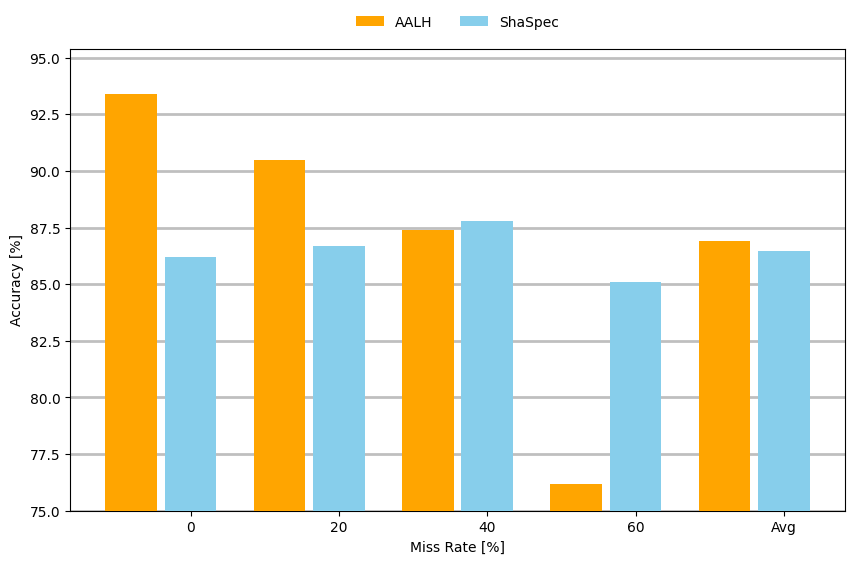

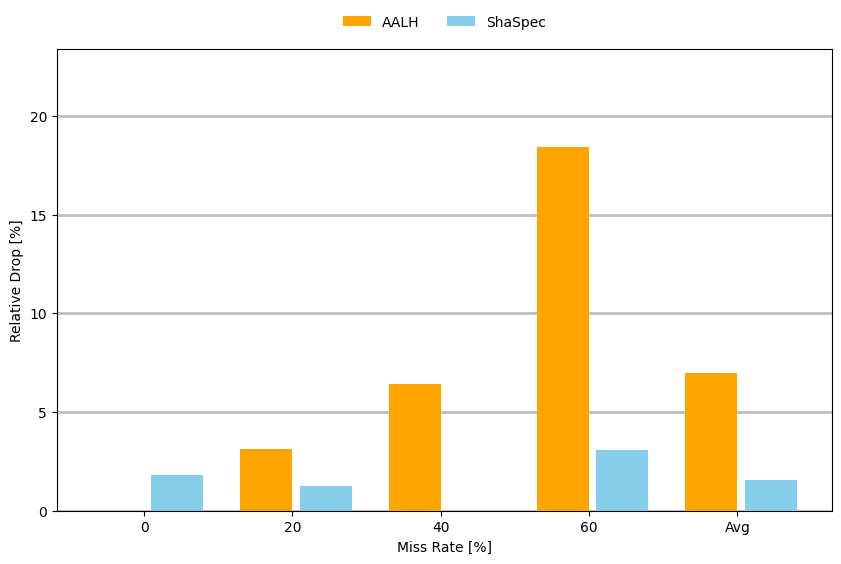

[100.0, 96.8950749464668, 93.57601713062098, 81.58458244111348, 93.04068522483941]
[100.0, 100.5800464037123, 101.85614849187934, 98.72389791183294, 100.29002320185614]


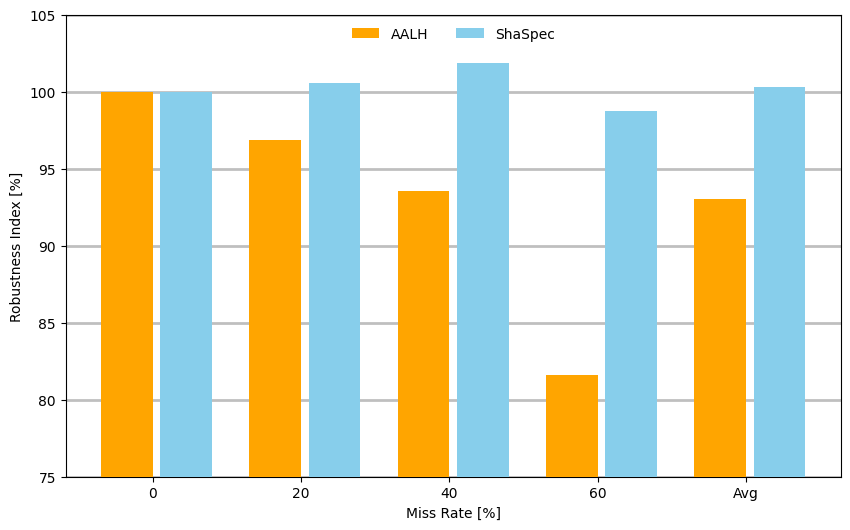

In [4]:
print("=" * 16, f" {dataset} Results w/ Full Model ", "=" * 16)
plot_results_comparison(dataset, categories_dsads, AALH_acc_dsads, ShaSpec_values_dsads)
plot_relative_drop_comparison(dataset, categories_dsads, AALH_acc_dsads, ShaSpec_values_dsads)
plot_robustness_index_comparison(dataset, categories_dsads, AALH_acc_dsads, ShaSpec_values_dsads)

================  REALDISP Results w/ Full Model  ================


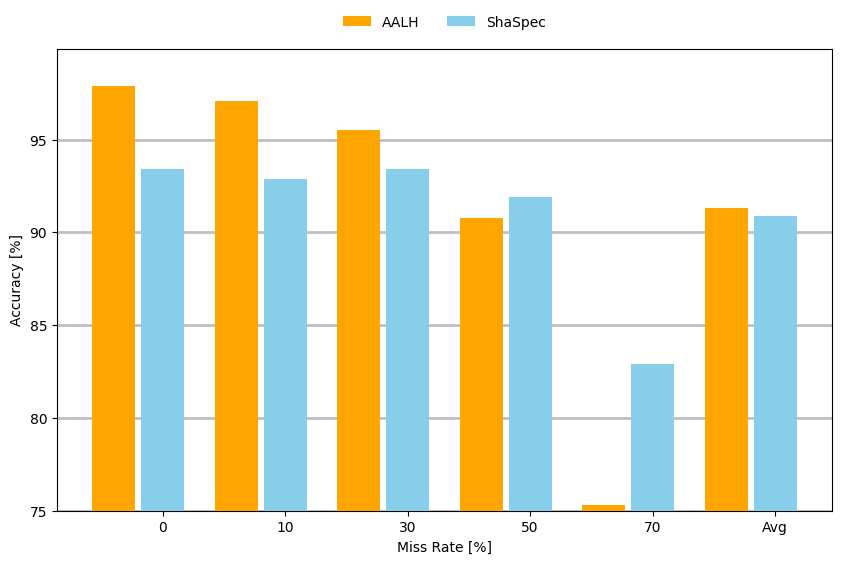

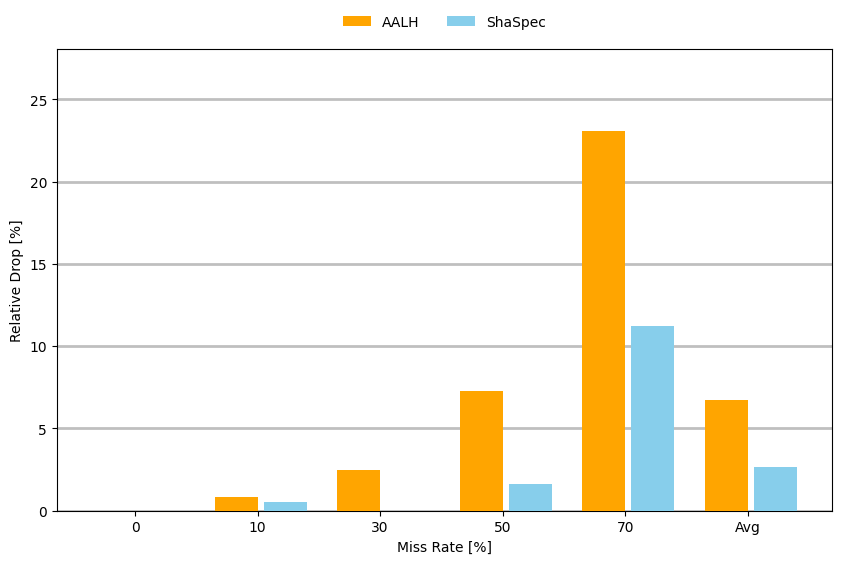

[100.0, 99.18283963227782, 97.5485188968335, 92.74770173646577, 76.91521961184881, 93.25842696629213]
[100.0, 99.46466809421841, 100.0, 98.39400428265525, 88.7580299785867, 97.32334047109208]


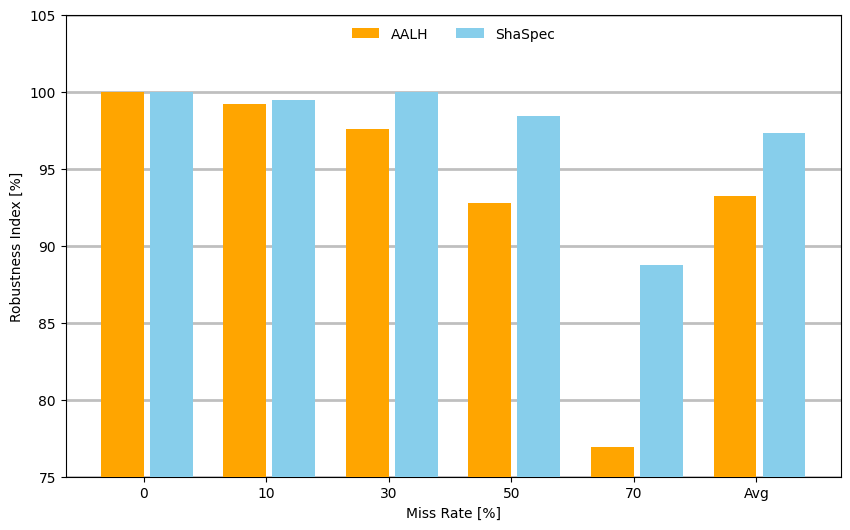

In [5]:

dataset = "REALDISP"
categories_realdisp, ShaSpec_values_realdisp = get_shaspec_results(dataset, df_full_model)

print("=" * 16, f" {dataset} Results w/ Full Model ", "=" * 16)
plot_results_comparison(dataset, categories_realdisp, AALH_acc_realdisp, ShaSpec_values_realdisp)
plot_relative_drop_comparison(dataset, categories_realdisp, AALH_acc_realdisp, ShaSpec_values_realdisp)
plot_robustness_index_comparison(dataset, categories_realdisp, AALH_acc_realdisp, ShaSpec_values_realdisp)

In [6]:
### Plot ablation studies

def plot_ablate_comparison(bottom, dataset, categories, ShaSpec_values, ShaSpec_values_ablated_modgen, ShaSpec_values_ablated_shaenc):
    # Creating the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set the bar width and gap
    bar_width = 0.25
    bar_space = 0.05

    # Set position of bar on X axis
    r1 = range(len(ShaSpec_values))
    r2 = [x + bar_width + bar_space for x in r1]
    r3 = [x + bar_width + bar_space for x in r2]

    # Make the plot
    ax.bar(r1, ShaSpec_values, color='skyblue', width=bar_width, label='ShaSpec', zorder=3)
    ax.bar(r2, ShaSpec_values_ablated_modgen, color='lightcoral', width=bar_width, label='ShaSpec w/o Missing Modality Feature Generation', zorder=3)
    ax.bar(r3, ShaSpec_values_ablated_shaenc, color='navajowhite', width=bar_width, label='ShaSpec w/o SharedEncoder', zorder=3)

    # Adding labels
    ax.set_xlabel('Miss Rate [%]')
    ax.set_ylabel('Accuracy [%]')
    ax.set_xticks([r + bar_width + bar_space for r in range(len(ShaSpec_values))])
    ax.set_xticklabels(categories)
    
    # Adjust the y-axis to start at 75 and end a little above the highest value
    ax.set_ylim(bottom=bottom, top=max(ShaSpec_values + ShaSpec_values_ablated_modgen + ShaSpec_values_ablated_shaenc) + 2)

    # Add vertical stripes/grid
    ax.grid(True, axis='y', linestyle='-', alpha=0.5, color='grey', linewidth=2, zorder=0)

    # Creating legend inside the plot area but above the bars and grid lines
    # Adjust the bbox_to_anchor values to suit your plot's specific dimensions
    ax.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.1), frameon=False)

    plt.show()

    # Export to pdf
    fig.savefig(f'plot_ablation_studies_comparison_{dataset}.pdf', bbox_inches='tight')

[86.2, 86.7, 87.8, 85.1, 86.45]
[86.2, 88.0, 85.5, 83.6, 85.82]
[88.3, 84.3, 83.7, 81.0, 84.33]
================  DSADS Ablation Study Results  ================


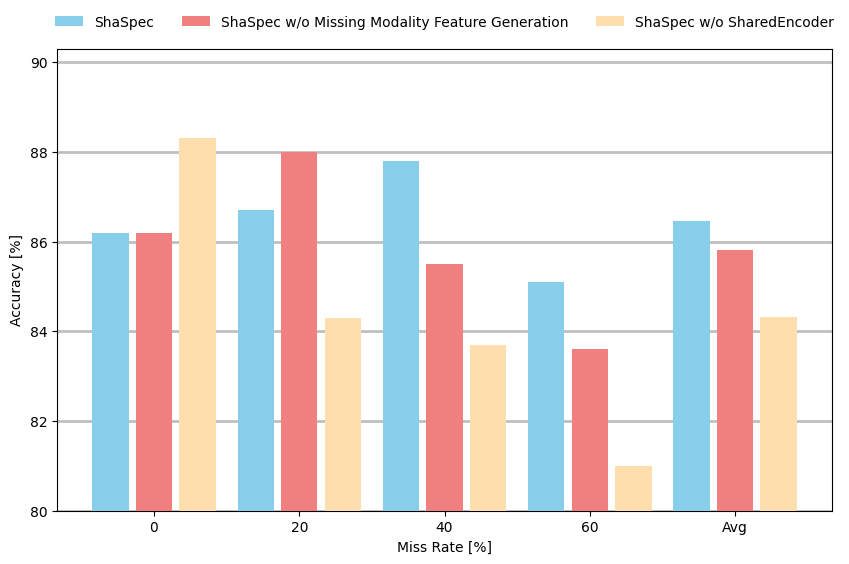

In [7]:
# DSADS results
dataset = "DSADS"

bottom = 80
_, ShaSpec_values_dsads_ablated_modgen = get_shaspec_results(dataset, df_ablate_missmodgen)
_, ShaSpec_values_dsads_ablated_shaenc = get_shaspec_results(dataset, df_ablate_shaenc)

print(ShaSpec_values_dsads)
print(ShaSpec_values_dsads_ablated_modgen)
print(ShaSpec_values_dsads_ablated_shaenc)

print("=" * 16, f" {dataset} Ablation Study Results ", "=" * 16)
plot_ablate_comparison(bottom, dataset, categories_dsads, ShaSpec_values_dsads, ShaSpec_values_dsads_ablated_modgen, ShaSpec_values_dsads_ablated_shaenc)

================  REALDISP Ablation Study Results  ================


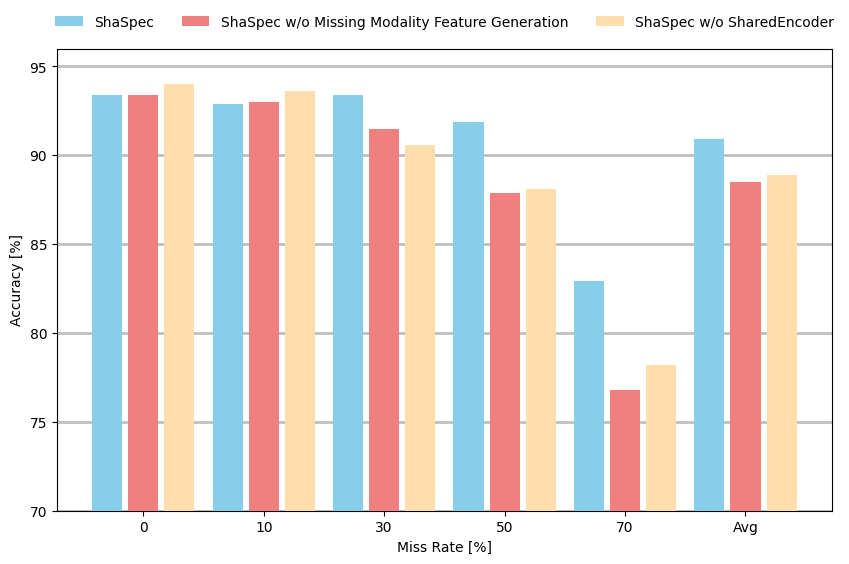

In [8]:
# DSADS results
dataset = "REALDISP"

bottom = 70
_, ShaSpec_values_realdisp_ablated_modgen = get_shaspec_results(dataset, df_ablate_missmodgen)
_, ShaSpec_values_realdisp_ablated_shaenc = get_shaspec_results(dataset, df_ablate_shaenc)

print("=" * 16, f" {dataset} Ablation Study Results ", "=" * 16)
plot_ablate_comparison(bottom, dataset, categories_realdisp, ShaSpec_values_realdisp, ShaSpec_values_realdisp_ablated_modgen, ShaSpec_values_realdisp_ablated_shaenc)